1. Connecting notebook to excel

In [2]:
#pip install pandas openpyxl xlrd

In [385]:
import pandas as pd

file_path = '/Users/meftahuddin/Desktop/Codes/BuildingAmerica_DHW.xlsm'
sheet_name = 'Std 2br' 
# Load the data from a specific sheet
df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
df.head()

,Standard DHW Event Schedule for 2-Bedroom House in 6 second time-steps,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Start Time,Duration (sec),Fixture,Flow Rate\nHot & Cold\n(gpm),Flow Rate\nHot Only\n(gpm),Flow Rate\nCold Only\n(gpm),NaN,For Verification Purposes - Denver - Flow Rate...
1,2007-01-01 00:33:54,96,Sink 2,0.935,0.74829,0.18671,NaN,0.701
2,2007-01-01 00:35:48,114,Kitchen Sink,0.051,0.040816,0.010184,NaN,0.038
3,2007-01-01 00:37:48,54,Sink 2,1.311,1.049207,0.261793,NaN,0.983
4,2007-01-01 00:39:42,18,Sink 4,0.628,0.502595,0.125405,NaN,0.471


In [387]:
df.tail()

,Standard DHW Event Schedule for 2-Bedroom House in 6 second time-steps,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
12709,2007-12-31 20:30:24,6,Kitchen Sink,0.41,0.32796,0.08204,NaN,0.31
12710,2007-12-31 20:38:30,30,Kitchen Sink,1.429,1.143062,0.285938,NaN,1.081
12711,2007-12-31 21:43:00,12,Kitchen Sink,2.034,1.627004,0.406996,NaN,1.539
12712,2007-12-31 22:18:00,42,Kitchen Sink,0.402,0.321561,0.080439,NaN,0.305
12713,2007-12-31 22:19:54,6,Kitchen Sink,0.138,0.110387,0.027613,NaN,0.105


In [389]:
df = df[1:12713]
df.head()

,Standard DHW Event Schedule for 2-Bedroom House in 6 second time-steps,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,2007-01-01 00:33:54,96,Sink 2,0.935,0.74829,0.18671,NaN,0.701
2,2007-01-01 00:35:48,114,Kitchen Sink,0.051,0.040816,0.010184,NaN,0.038
3,2007-01-01 00:37:48,54,Sink 2,1.311,1.049207,0.261793,NaN,0.983
4,2007-01-01 00:39:42,18,Sink 4,0.628,0.502595,0.125405,NaN,0.471
5,2007-01-01 06:51:00,336,Shower 2,2.361,1.889533,0.471467,NaN,1.77


In [391]:
df.columns

Index(['Standard DHW Event Schedule for 2-Bedroom House in 6 second time-steps',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [393]:
df = df.rename(columns={
    "Standard DHW Event Schedule for 2-Bedroom House in 6 second time-steps": "datetime",
    "Unnamed: 4": "hw_gpm"
})
df.head()

,datetime,Unnamed: 1,Unnamed: 2,Unnamed: 3,hw_gpm,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,2007-01-01 00:33:54,96,Sink 2,0.935,0.74829,0.18671,NaN,0.701
2,2007-01-01 00:35:48,114,Kitchen Sink,0.051,0.040816,0.010184,NaN,0.038
3,2007-01-01 00:37:48,54,Sink 2,1.311,1.049207,0.261793,NaN,0.983
4,2007-01-01 00:39:42,18,Sink 4,0.628,0.502595,0.125405,NaN,0.471
5,2007-01-01 06:51:00,336,Shower 2,2.361,1.889533,0.471467,NaN,1.77


2. Creating new csv file with Hot water and datetime

In [395]:
water_df = df.drop(["Unnamed: 1","Unnamed: 2", "Unnamed: 3","Unnamed: 5", "Unnamed: 6", "Unnamed: 7"], axis=1)
water_df.head()

# Save the result to a new CSV file
water_df.to_csv('water.csv', index=True)

3. Importing water consumption data from building america excel file

In [397]:
import pandas as pd

In [399]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,datetime,hw_gpm
0,1,2007-01-01 00:33:54,0.748290
1,2,2007-01-01 00:35:48,0.040816
2,3,2007-01-01 00:37:48,1.049207
3,4,2007-01-01 00:39:42,0.502595
4,5,2007-01-01 06:51:00,1.889533


In [401]:
df = df.drop(["Unnamed: 0"], axis =1)
df.head()

,datetime,hw_gpm
0,2007-01-01 00:33:54,0.748290
1,2007-01-01 00:35:48,0.040816
2,2007-01-01 00:37:48,1.049207
3,2007-01-01 00:39:42,0.502595
4,2007-01-01 06:51:00,1.889533


4. Converting to 8760 hourly data

In [404]:
df.columns

Index(['datetime', 'hw_gpm'], dtype='object')

5. Loading hourly data

In [407]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
hourly_df = df['hw_gpm'].resample('h').mean()

In [409]:
hourly_df = hourly_df.fillna(0)  # or .fillna(method='ffill') or .interpolate()
hourly_df = pd.DataFrame(hourly_df)
hourly_df.head(10)

,hw_gpm
datetime,
2007-01-01 00:00:00,0.585227
2007-01-01 01:00:00,0.000000
2007-01-01 02:00:00,0.000000
2007-01-01 03:00:00,0.000000
2007-01-01 04:00:00,0.000000
2007-01-01 05:00:00,0.000000
2007-01-01 06:00:00,1.889533
2007-01-01 07:00:00,1.479241
2007-01-01 08:00:00,1.812383


In [411]:
len(hourly_df)

8759

In [413]:
import numpy as np
hourly_df['datetime'] = hourly_df.index
hourly_df.index = range(1, len(hourly_df) + 1)

hourly_df.head()

,hw_gpm,datetime
1,0.585227,2007-01-01 00:00:00
2,0.000000,2007-01-01 01:00:00
3,0.000000,2007-01-01 02:00:00
4,0.000000,2007-01-01 03:00:00
5,0.000000,2007-01-01 04:00:00


In [415]:
first_column = hourly_df.pop('datetime') 
hourly_df.insert(0, 'datetime', first_column) 

hourly_df.head(10)

,datetime,hw_gpm
1,2007-01-01 00:00:00,0.585227
2,2007-01-01 01:00:00,0.000000
3,2007-01-01 02:00:00,0.000000
4,2007-01-01 03:00:00,0.000000
5,2007-01-01 04:00:00,0.000000
6,2007-01-01 05:00:00,0.000000
7,2007-01-01 06:00:00,1.889533
8,2007-01-01 07:00:00,1.479241
9,2007-01-01 08:00:00,1.812383
10,2007-01-01 09:00:00,1.444560


In [417]:
# Define the new year
new_year = 2024

# Change the year in the datetime column
hourly_df['datetime'] = hourly_df['datetime'].apply(lambda dt: dt.replace(year=new_year))
hourly_df.head(10)

,datetime,hw_gpm
1,2024-01-01 00:00:00,0.585227
2,2024-01-01 01:00:00,0.000000
3,2024-01-01 02:00:00,0.000000
4,2024-01-01 03:00:00,0.000000
5,2024-01-01 04:00:00,0.000000
6,2024-01-01 05:00:00,0.000000
7,2024-01-01 06:00:00,1.889533
8,2024-01-01 07:00:00,1.479241
9,2024-01-01 08:00:00,1.812383
10,2024-01-01 09:00:00,1.444560


In [436]:
# Save the result to a new CSV file
hourly_df.to_csv('hourly_aggregated_water.csv', index=True)

6. Loading new data

In [439]:
new_df = pd.read_csv("hourly_aggregated_water.csv")
new_df.head()

,Unnamed: 0,datetime,hw_gpm
0,1,2024-01-01 00:00:00,0.585227
1,2,2024-01-01 01:00:00,0.000000
2,3,2024-01-01 02:00:00,0.000000
3,4,2024-01-01 03:00:00,0.000000
4,5,2024-01-01 04:00:00,0.000000


In [441]:
new_df = new_df.drop(["Unnamed: 0"], axis =1)
new_df.head()

,datetime,hw_gpm
0,2024-01-01 00:00:00,0.585227
1,2024-01-01 01:00:00,0.000000
2,2024-01-01 02:00:00,0.000000
3,2024-01-01 03:00:00,0.000000
4,2024-01-01 04:00:00,0.000000


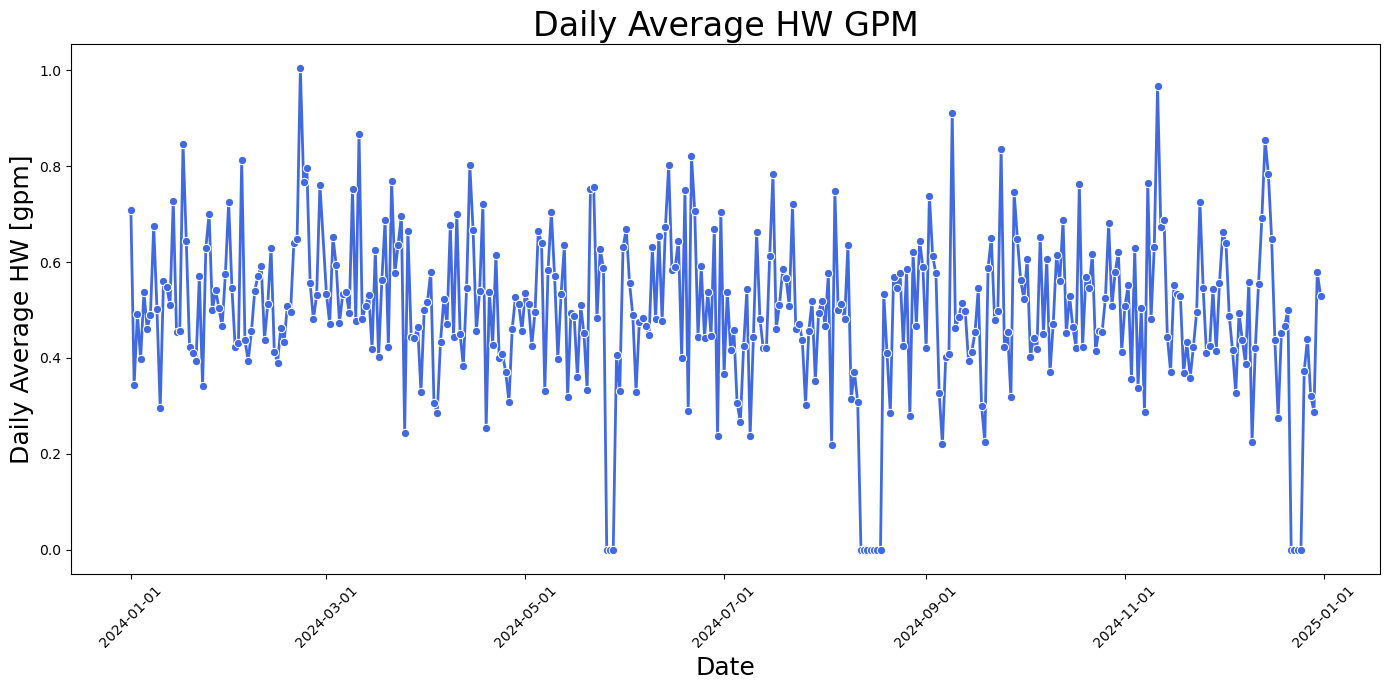

In [453]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'datetime' column to datetime dtype if it's not already
new_df['datetime'] = pd.to_datetime(new_df['datetime'])

# Set 'datetime' as the index for resampling
daily_avg_df = new_df.set_index('datetime').resample('D').mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_avg_df, x='datetime', y='hw_gpm', marker='o', color='royalblue', linewidth=2)
plt.title('Daily Average HW GPM', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily Average HW [gpm]', fontsize=18)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.grid(False)
plt.tight_layout()
plt.show()


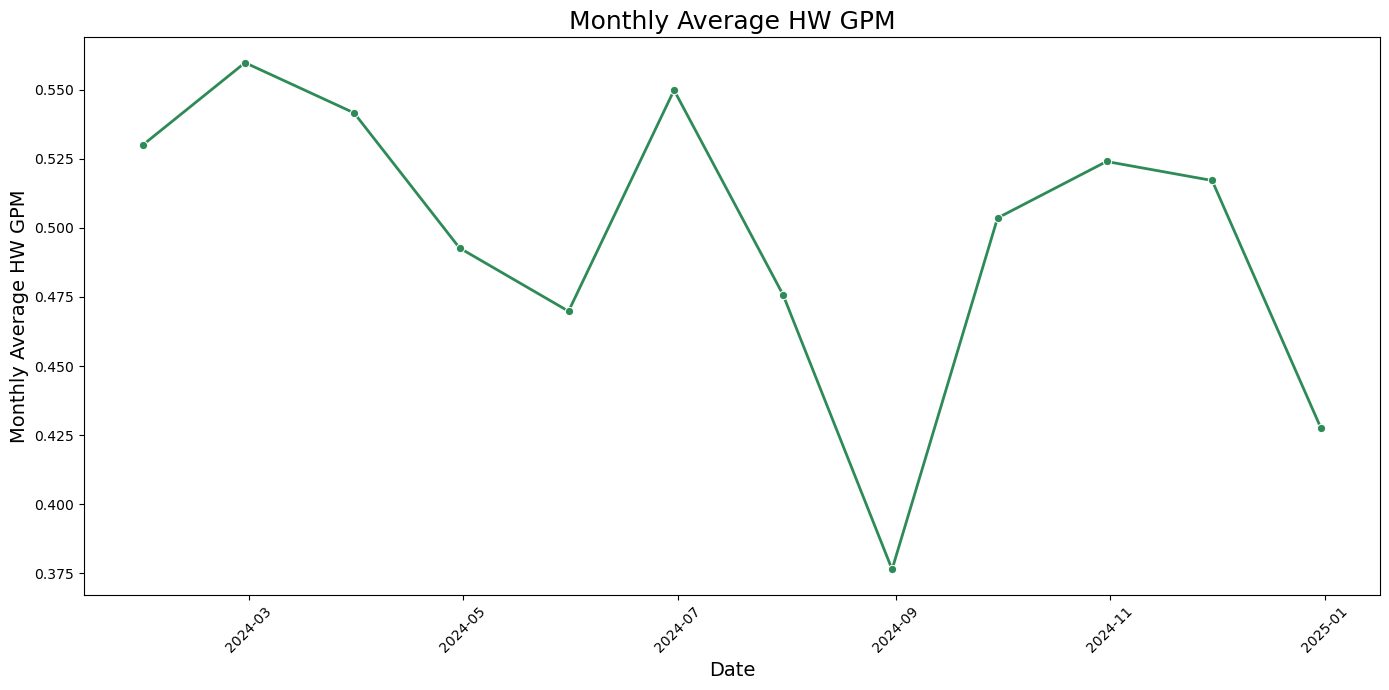

In [461]:
# Set 'datetime' as the index for resampling
monthly_avg_df = new_df.set_index('datetime').resample('ME').mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg_df, x='datetime', y='hw_gpm', marker='o', color='seagreen', linewidth=2)
plt.title('Monthly Average HW GPM', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Monthly Average HW GPM', fontsize=14)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.grid(False)
plt.tight_layout()
plt.show()


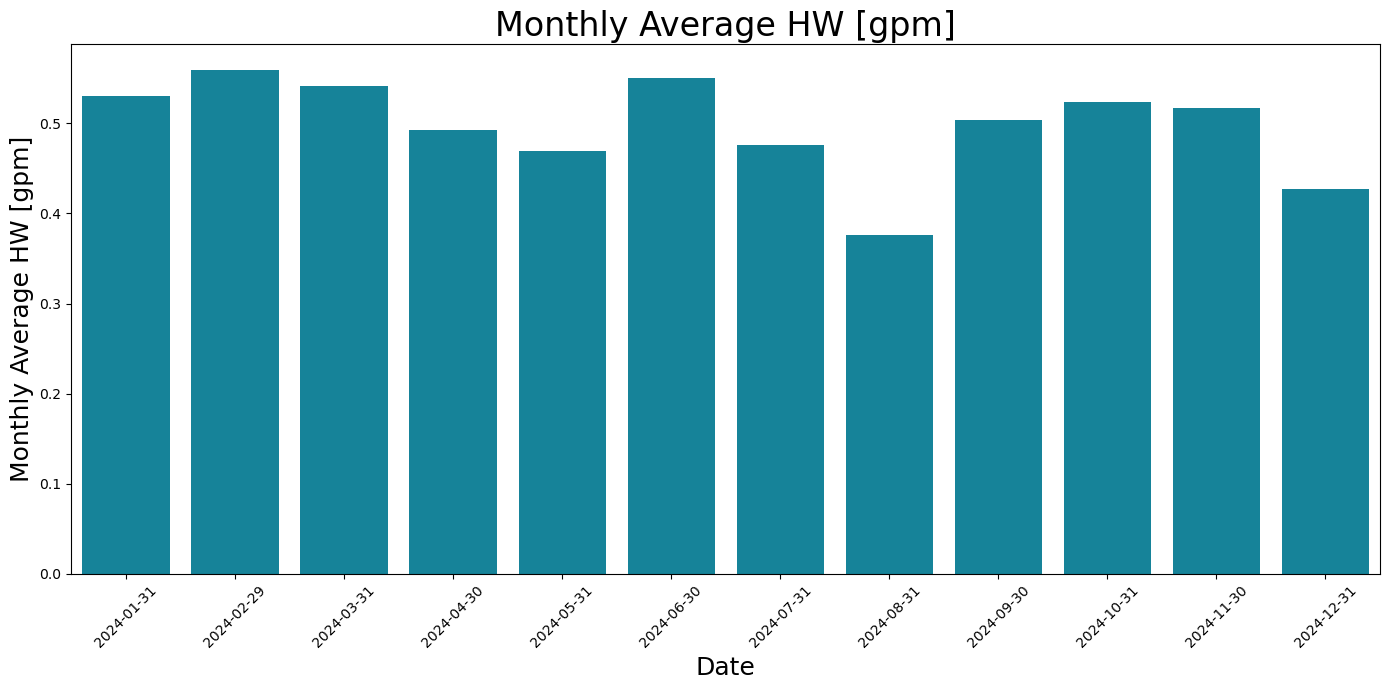

In [481]:
plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_avg_df, x='datetime', y='hw_gpm', color='#0092af')
plt.title('Monthly Average HW [gpm]', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Monthly Average HW [gpm]', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
